In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# import the requirements

In [20]:
# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

data=pd.read_csv("C:\\Users\\sony\\A_MACHINE LEARNING AND DEEP LEARNING- INEURON\\Banking Dataset Classification\\Data_Set\\Train_process_dataset.csv")
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,2,69,retired,married,basic.4y,no,no,no,cellular,jul,mon,643,1,999,0,nonexistent,yes
3,3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [21]:
data.drop(columns=["Unnamed: 0"],inplace=True)

## Convert the Categorical column to the numerical column

## Encoding Categorical Features
**Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values**

In [23]:
#categorical features
# indentifying the categorical variables
cat_var= data.select_dtypes(include= ["object"]).columns
print(cat_var)

print("\n",70*"=")
# check categorical class
for i in cat_var:
    print(i, ":", data[i].unique())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

job : ['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'housemaid']
marital : ['married' 'divorced' 'single']
education : ['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'basic.6y' 'illiterate']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'telephone']
month : ['nov' 'jul' 'may' 'jun' 'aug' 'mar' 'oct' 'apr' 'sep' 'dec']
day_of_week : ['wed' 'mon' 'tue' 'fri' 'thu']
poutcome : ['nonexistent' 'failure' 'success']
y : ['no' 'yes']


**Features like job education month day_of_week has so many categories, we will Label Encode them as One Hot Encoding would create so many columns**

In [25]:
# initializing label encoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])
    
data.head()    

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0,0
2,69,5,1,0,0,0,0,0,3,1,643,1,999,0,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1,0


# Feature Selection:

In [26]:
# Feature Selection:
corr=data.corr()
corr


# Co-relation Matrix to check the multi-colinearity 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.017203,-0.398339,-0.122137,0.002267,-0.003372,-0.004488,0.012645,-0.030064,-0.020617,0.001487,0.002518,-0.024922,0.012464,0.019256,0.019023
job,-0.017203,1.000000,0.028103,0.131251,0.015322,0.009210,-0.013945,-0.031371,-0.027566,-0.002116,-0.004724,-0.008583,-0.029163,0.025036,0.006446,0.025676
marital,-0.398339,0.028103,1.000000,0.111112,-0.002680,0.017711,0.007988,-0.054023,-0.005747,0.002693,0.006069,-0.005602,-0.041779,0.040406,0.004104,0.049361
education,-0.122137,0.131251,0.111112,1.000000,0.002874,0.022380,0.010166,-0.109040,-0.085088,-0.016576,-0.020813,-0.000301,-0.047856,0.040504,0.016647,0.058562
default,0.002267,0.015322,-0.002680,0.002874,1.000000,-0.004112,-0.004047,-0.007242,-0.005074,0.006811,-0.007100,-0.005787,0.001876,0.003033,-0.006886,-0.003400
housing,-0.003372,0.009210,0.017711,0.022380,-0.004112,1.000000,0.037050,-0.078204,-0.016748,0.003664,-0.011189,-0.012538,-0.012398,0.027166,-0.015725,0.009753
loan,-0.004488,-0.013945,0.007988,0.010166,-0.004047,0.037050,1.000000,-0.014854,-0.008315,-0.012768,-0.002858,0.012306,0.002182,-0.002134,-0.002950,-0.000499
contact,0.012645,-0.031371,-0.054023,-0.109040,-0.007242,-0.078204,-0.014854,1.000000,0.275416,-0.007182,-0.036123,0.067726,0.116561,-0.212673,0.121541,-0.143238
month,-0.030064,-0.027566,-0.005747,-0.085088,-0.005074,-0.016748,-0.008315,0.275416,1.000000,0.023675,0.006848,-0.063077,-0.047776,0.103726,-0.065620,-0.007508
day_of_week,-0.020617,-0.002116,0.002693,-0.016576,0.006811,0.003664,-0.012768,-0.007182,0.023675,1.000000,0.031671,-0.049941,-0.005215,-0.004263,0.014240,0.011926


<AxesSubplot:>

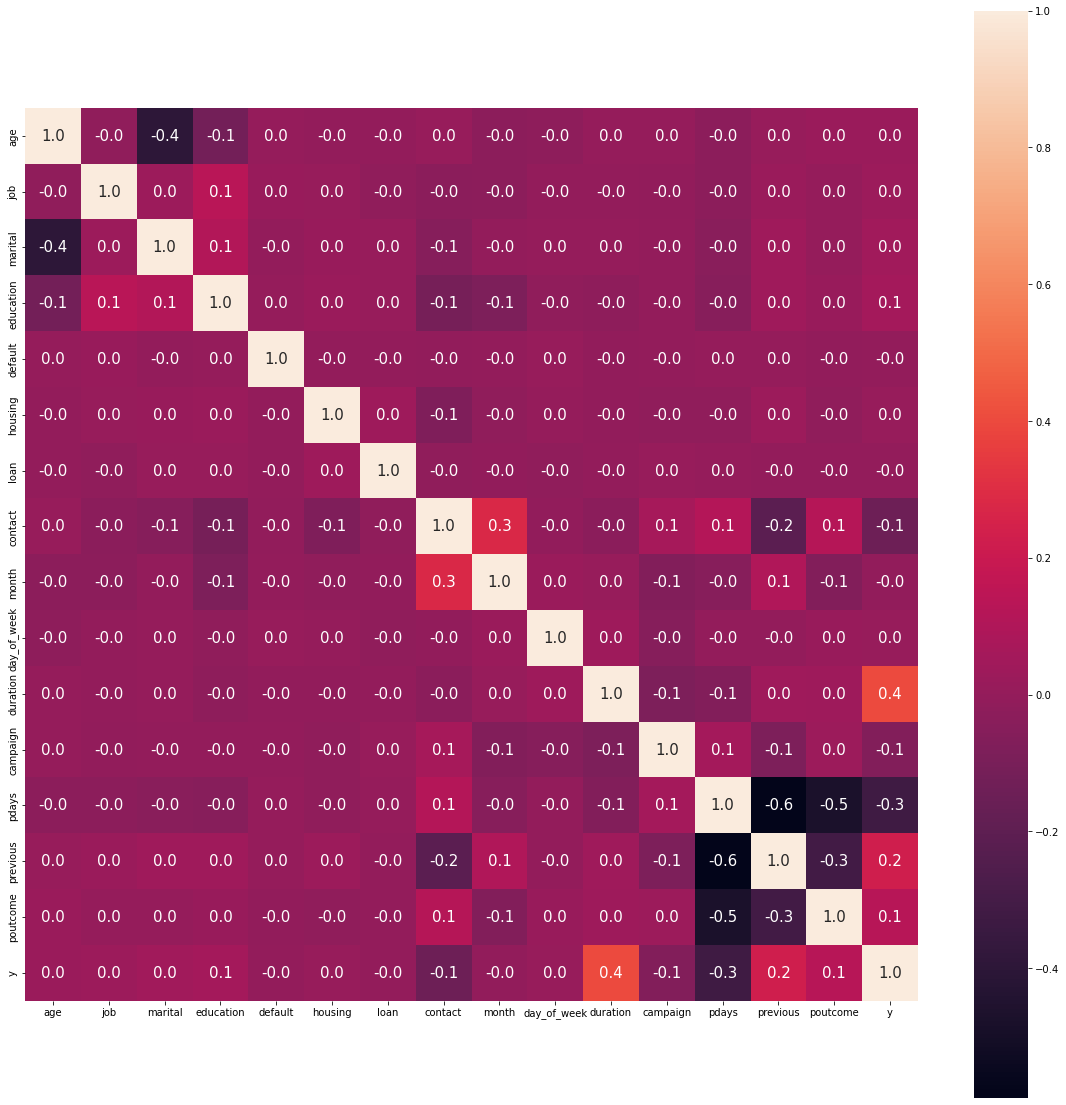

In [27]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [28]:
threshold=0.7
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(data.iloc[:,:-1],threshold)

set()

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA(F-TEST)


# Separate the target column the from the dataset
X = data.drop(columns=['y'])
y=data["y"] 

print("Feature data dimension: ", X.shape)

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=f_classif,k=15)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(10,'Score'))
#By using SelectKbest method findding the top 10 features:

Feature data dimension:  (32950, 15)
Feature listed by socore: 
        Features        Score
10     duration  6287.747919
12        pdays  3905.584765
13     previous  1836.226549
7       contact   690.157641
14     poutcome   546.933764
11     campaign   149.940850
3     education   113.382436
2       marital    80.475455
1           job    21.735045
0           age    11.927133
9   day_of_week     4.686957
5       housing     3.134047
8         month     1.857317
4       default     0.380890
6          loan     0.008206 

Top 10 Features are : 
      Features        Score
10   duration  6287.747919
12      pdays  3905.584765
13   previous  1836.226549
7     contact   690.157641
14   poutcome   546.933764
11   campaign   149.940850
3   education   113.382436
2     marital    80.475455
1         job    21.735045
0         age    11.927133


In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Separate the target column the from the dataset
X = data.drop(columns=['y'])
y=data["y"] 

print("Feature data dimension: ", X.shape)

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=15)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(10,'Score'))
#By using SelectKbest method findding the top 10 features:

Feature data dimension:  (32950, 15)
Feature listed by socore: 
        Features          Score
10     duration  703008.714492
12        pdays  128215.213406
13     previous    2479.072099
7       contact     428.971649
11     campaign     157.151353
3     education     132.055777
14     poutcome      76.773388
1           job      75.260107
0           age      30.572565
2       marital      24.974467
9   day_of_week       4.593153
8         month       2.360724
5       housing       1.417168
4       default       0.380874
6          loan       0.006955 

Top 10 Features are : 
      Features          Score
10   duration  703008.714492
12      pdays  128215.213406
13   previous    2479.072099
7     contact     428.971649
11   campaign     157.151353
3   education     132.055777
14   poutcome      76.773388
1         job      75.260107
0         age      30.572565
2     marital      24.974467
